In [2]:
%matplotlib notebook
import common
import plot_demand_heatmap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

In [6]:
df = common.load_data(nrows=10000)

Executing: load_data
With Args: None
With Kwargs: 
	nrows : 10000
Result: <class 'pandas.core.frame.DataFrame'>
Execution Duration: 0.950248003006 seconds



In [23]:
def plot_density():
    # start_dt = datetime(2014, 1, 10, 4, 0)
    # end_dt = datetime(2014, 1, 10, 4, 10)
    # df = common.query_dates(df, start_dt, end_dt, "dropoff_datetime") 
    arr = common.get_pickup_geos(df)
    hm, xedges, yedges = np.histogram2d(arr[:, 0], arr[:, 1], bins=1000)
    #plt.ylim(-73.70, -73.87)
    #plt.xlim(40.68, 40.80)
    ax = plt.gca()
    sfreq = Slider(ax, 'Freq', 0.1, 30.0, valinit=3)
    plt.pcolor(hm)
    plt.show()

<IPython.core.display.Javascript object>


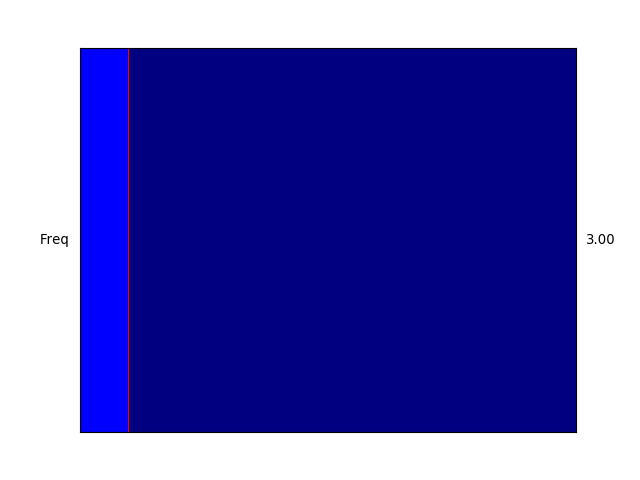

In [24]:
plot_density()

<IPython.core.display.Javascript object>


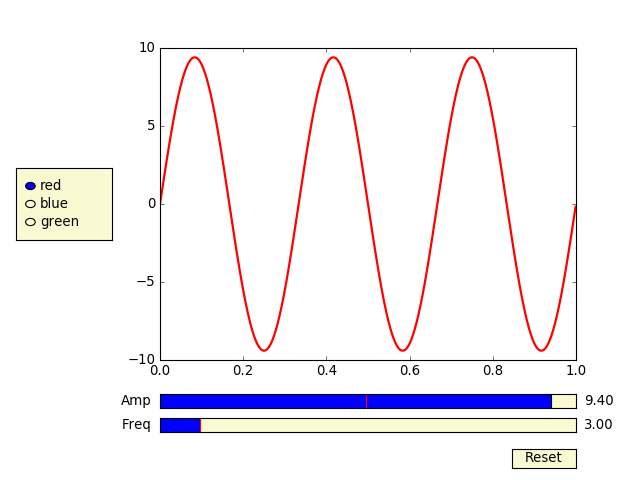

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], axisbg=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()